In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

Data Collection

In [3]:
# loading the dataset to a Pandas DataFrame
wine_dataset = pd.read_csv('winequality-red.csv')

In [4]:
# number of rows & columns in the dataset
wine_dataset.shape

(1599, 12)

In [5]:
# first 5 rows of the dataset
wine_dataset.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [6]:
# checking for missing values
wine_dataset.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

Data Analysis and Visulaization

In [7]:
# statistical measures of the dataset
wine_dataset.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


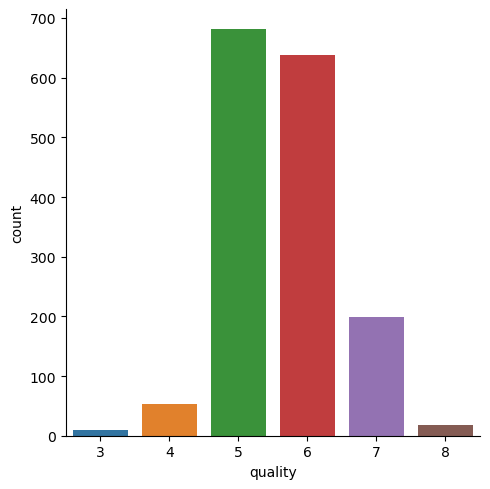

In [8]:
# number of values for each quality
sns.catplot(x='quality', data = wine_dataset, kind = 'count')

<Axes: xlabel='quality', ylabel='volatile acidity'>

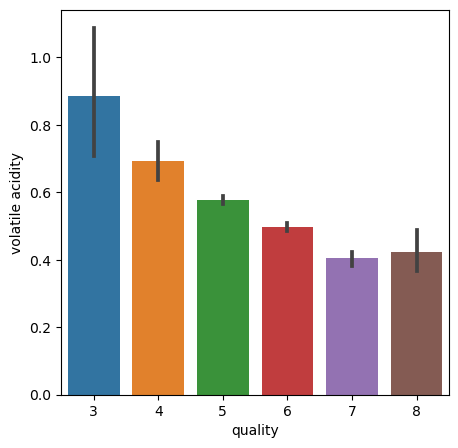

In [9]:
# volatile acidity vs Quality
plot = plt.figure(figsize=(5,5))
sns.barplot(x='quality', y = 'volatile acidity', data = wine_dataset)

<Axes: xlabel='quality', ylabel='citric acid'>

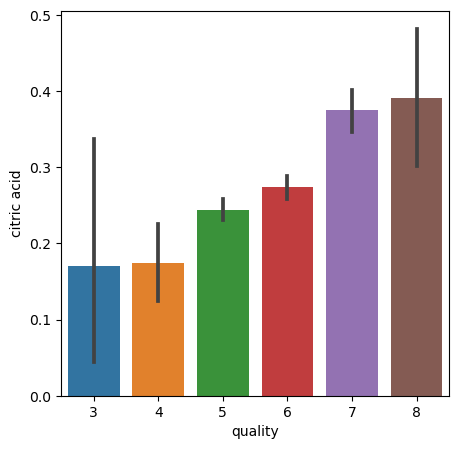

In [10]:
# citric acid vs Quality
plot = plt.figure(figsize=(5,5))
sns.barplot(x='quality', y = 'citric acid', data = wine_dataset)

In [11]:
wine_dataset.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

<Axes: xlabel='quality', ylabel='alcohol'>

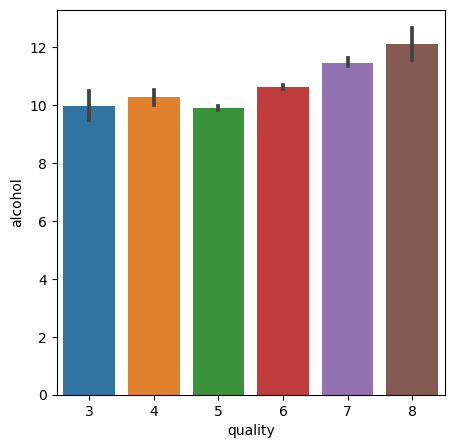

In [12]:
# citric acid vs Quality
plot = plt.figure(figsize=(5,5))
sns.barplot(x='quality', y = 'alcohol', data = wine_dataset)

<Axes: xlabel='quality', ylabel='residual sugar'>

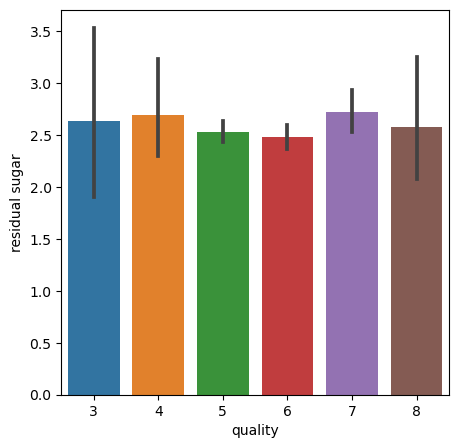

In [13]:
# volatile acidity vs Quality
plot = plt.figure(figsize=(5,5))
sns.barplot(x='quality', y = 'residual sugar', data = wine_dataset)

Correlation

1. Positive Correlation
2. Negative Correlation

In [14]:
correlation = wine_dataset.corr()

<Axes: >

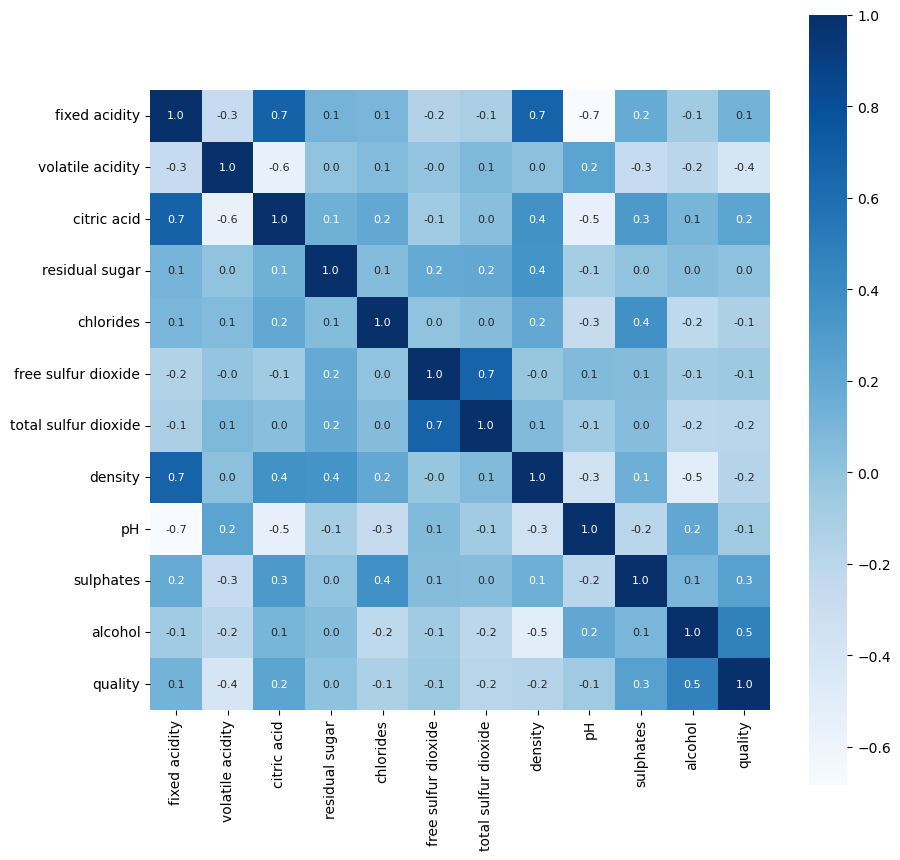

In [15]:
# constructing a heatmap to understand the correlation between the columns
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square=True, fmt = '.1f', annot = True, annot_kws={'size':8}, cmap = 'Blues')


##  Binarizaton of target variable

In [16]:
wine_dataset['quality'].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

In [17]:
wine_dataset['quality']=[1 if x>=7 else 0 for x in wine_dataset['quality']]

In [18]:
wine_dataset['quality'].unique()

array([0, 1], dtype=int64)

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
X_res,y_res = SMOTE().fit_resample(X,Y)

In [ ]:
y_res.value_counts()

0    1382
1    1382
Name: quality, dtype: int64

Data Preprocessing

In [19]:
X = wine_dataset.drop('quality',axis=1)
Y = wine_dataset['quality']

Train & Test Split

In [20]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=3)
#X_train,X_test,Y_train,Y_test = train_test_split(X_res,y_res,test_size=0.20,random_state=42)

In [21]:
print(Y.shape, Y_train.shape, Y_test.shape)

(1599,) (1279,) (320,)


In [22]:
Y_train

606     1
362     0
533     0
1397    0
733     0
       ..
789     0
256     0
968     0
952     1
1273    0
Name: quality, Length: 1279, dtype: int64

## Feature Scaling

In [23]:
from sklearn.preprocessing import StandardScaler

In [24]:
st  =StandardScaler()
X_train = st.fit_transform(X_train)
X_test = st.transform(X_test)

In [25]:
Y_train

606     1
362     0
533     0
1397    0
733     0
       ..
789     0
256     0
968     0
952     1
1273    0
Name: quality, Length: 1279, dtype: int64

##Applying PCA

In [26]:
from sklearn.decomposition import PCA


In [27]:
Pca = PCA(n_components=0.90)

In [28]:
X_train = Pca.fit_transform(X_train)
X_test = Pca.transform(X_test)

In [29]:
sum(Pca.explained_variance_ratio_)

0.9073666195550959

In [30]:
Pca.explained_variance_ratio_

array([0.28297375, 0.17380296, 0.13896282, 0.10833755, 0.0903132 ,
       0.0603874 , 0.05258894])

Model Training:

Random Forest Classifier

In [31]:
rf = RandomForestClassifier()

In [32]:
rf.fit(X_train, Y_train)

RandomForestClassifier()

Accuracy Score

In [33]:
# accuracy on test data
prediction = rf.predict(X_test)
accuracy = accuracy_score(prediction, Y_test)

In [34]:
print('Accuracy : ', accuracy)

Accuracy :  0.93125


In [35]:
from sklearn.metrics import precision_score, recall_score, f1_score

In [36]:
print('Precision : ', precision_score(Y_test,prediction))
print('Recall : ', recall_score(Y_test,prediction))
print('F1 : ', f1_score(Y_test,prediction))


Precision :  0.8260869565217391
Recall :  0.5135135135135135
F1 :  0.6333333333333333


##After OverSampling

In [37]:
print('Accuracy : ', accuracy)

Accuracy :  0.93125


In [38]:
print('Precision : ', precision_score(Y_test,prediction))
print('Recall : ', recall_score(Y_test,prediction))
print('F1 : ', f1_score(Y_test,prediction))

Precision :  0.8260869565217391
Recall :  0.5135135135135135
F1 :  0.6333333333333333


Building a Predictive System

In [39]:
import pandas as pd
new_data = pd.DataFrame({
    'fixed acidity':7.3,
    'volatile acidity':0.65,
    'citric acid':0.00,
    'residual sugar':1.2,
    'chlorides':0.065,
    'free sulfur dioxide':15.0,
    'total sulfur dioxide':21.0,
    'density':0.9946,
    'pH':3.39,
    'sulphates':0.47,
    'alcohol':10.0,
     
},index=[0])
test = Pca.transform(st.transform(new_data))

prediction = rf.predict(test)
print(prediction)

if (prediction[0]==1):
  print('Good Quality Wine')
else:
  print('Bad Quality Wine')

[1]
Good Quality Wine


## Model Training:

# KNeighbors Classifier

In [40]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

In [41]:
knn.fit(X_train, Y_train)
pred = knn.predict(X_test)

In [42]:
accuracy = accuracy_score(Y_test,pred)

In [43]:
accuracy

0.89375

In [44]:
print('Precision : ', precision_score(Y_test,pred))
print('Recall : ', recall_score(Y_test,pred))
print('F1 : ', f1_score(Y_test,pred))

Precision :  0.5517241379310345
Recall :  0.43243243243243246
F1 :  0.48484848484848486


In [45]:
import pandas as pd
new_data = pd.DataFrame({
    'fixed acidity':7.3,
    'volatile acidity':0.65,
    'citric acid':0.00,
    'residual sugar':1.2,
    'chlorides':0.065,
    'free sulfur dioxide':15.0,
    'total sulfur dioxide':21.0,
    'density':0.9946,
    'pH':3.39,
    'sulphates':0.47,
    'alcohol':10.0,
     
},index=[0])
test = Pca.transform(st.transform(new_data))

prediction = knn.predict(test)
print(prediction)

if (prediction[0]==1):
  print('Good Quality Wine')
else:
  print('Bad Quality Wine')

[0]
Bad Quality Wine


In [49]:
import joblib
joblib.dump(rf,'wine_quality_prediction')
model = joblib.load('wine_quality_prediction')

In [50]:
from tkinter import *
from sklearn.preprocessing import StandardScaler
import joblib

In [ ]:
def show_entry_fields():
    p1=float(e1.get())
    p2=float(e2.get())
    p3=float(e3.get())
    p4=float(e4.get())
    p5=float(e5.get())
    p6=float(e6.get())
    p7=float(e7.get())
    p8=float(e8.get())
    p9=float(e9.get()) 
    p10=float(e10.get())
    p11=float(e11.get())
    model = joblib.load('wine_quality_prediction')
    result=model.predict(Pca.transform(st.transform([[p1,p2,p3,p4,p5,p6,
                           p7,p8,p9,p10,p11]])))
    
    if result[0] == 0:
        Label(master, text="Bad Quality Wine").grid(row=31)
    else:
        Label(master, text="Good Quality Wine").grid(row=31)
    
    
master = Tk()
master.title("Wine Quality Prediction Using Machine Learning")


label = Label(master, text = "Wine Quality Prediction Using ML"
                          , bg = "black", fg = "white"). \
                               grid(row=0,columnspan=2)


Label(master, text="fixed acidity").grid(row=1)
Label(master, text="volatile acidity").grid(row=2)
Label(master, text="citric acid").grid(row=3)
Label(master, text="residual sugar").grid(row=4)
Label(master, text="chlorides").grid(row=5)
Label(master, text="free sulfur dioxide").grid(row=6)
Label(master, text="total sulfur dioxide").grid(row=7)
Label(master, text="density").grid(row=8)
Label(master, text="pH").grid(row=9)
Label(master, text="sulphates").grid(row=10)
Label(master,text="alcohol").grid(row=11)


e1 = Entry(master)
e2 = Entry(master)
e3 = Entry(master)
e4 = Entry(master)
e5 = Entry(master)
e6 = Entry(master)
e7 = Entry(master)
e8 = Entry(master)
e9 = Entry(master)
e10 = Entry(master)
e11 = Entry(master)



e1.grid(row=1, column=1)
e2.grid(row=2, column=1)
e3.grid(row=3, column=1)
e4.grid(row=4, column=1)
e5.grid(row=5, column=1)
e6.grid(row=6, column=1)
e7.grid(row=7, column=1)
e8.grid(row=8, column=1)
e9.grid(row=9, column=1)
e10.grid(row=10,column=1)
e11.grid(row=11,column=1)


Button(master, text='Predict', command=show_entry_fields).grid()

mainloop()

C:\Users\admin\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
